The equation of motion of a simple pendulum can be written in terms of the angle $\theta$. $\ddot\theta = -\frac{g}{l}sin(\theta)$. However, this is a second order ODE. In order to simulate, we will write two first order ODE describing the change of angle (radians), and velocity (m per sec) as follows:

$$
\dot\theta = v \div l\\
\dot v = -g \times sin(\theta)
$$



In [1]:
# importing needed libraries
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
# Adjust the styles of the graph
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
def theta_dot(velocity, l=1):
    return velocity/l

def velocity_dot(theta,g=9.80665):
    return -g*np.sin(theta)

def odes(state, t):
    theta, velocity = state
    return theta_dot(velocity), velocity_dot(theta)

In [3]:
# Let's create a simple simulation
theta_0, v_0 = 1.0, 0.0
ts = np.linspace(0, 10, 1000)

results = odeint(odes, [theta_0, v_0], ts)
results.T

array([[ 1.        ,  0.99958659,  0.99834659, ..., -0.51945651,
        -0.49383544, -0.46774866],
       [ 0.        , -0.08259539, -0.16514691, ...,  2.53554346,
         2.5831797 ,  2.62858105]])

In [11]:
results.T[0]

array([ 1.        ,  0.99958659,  0.99834659,  0.99628064,  0.99338986,
        0.98967579,  0.98514043,  0.97978623,  0.97361612,  0.96663349,
        0.95884222,  0.95024669,  0.94085176,  0.93066287,  0.91968593,
        0.90792744,  0.89539446,  0.88209464,  0.86803621,  0.85322802,
        0.83767957,  0.82140099,  0.80440308,  0.78669733,  0.76829591,
        0.74921171,  0.72945834,  0.70905014,  0.6880022 ,  0.66633036,
        0.64405122,  0.62118213,  0.59774121,  0.57374736,  0.54922022,
        0.52418018,  0.4986484 ,  0.47264675,  0.44619781,  0.41932489,
        0.39205196,  0.36440363,  0.33640514,  0.30808235,  0.27946163,
        0.2505699 ,  0.22143456,  0.19208344,  0.16254477,  0.13284709,
        0.10301928,  0.07309044,  0.04308985,  0.01304694, -0.01700879,
       -0.04704781, -0.07704062, -0.10695781, -0.13677013, -0.16644849,
       -0.19596406, -0.22528834, -0.25439315, -0.2832507 , -0.31183368,
       -0.34011522, -0.368069  , -0.39566928, -0.42289087, -0.44

In [34]:
def plot(ts, thetas, velocities):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    # First subplot: times vs na
    ax1.plot(ts, thetas, label=r"$\theta$")
    ax1.plot(ts, velocities, label= r"$v$")
    ax1.legend()
    ax1.set_xlabel('Time (sec)')
    
    # Second subplot: times vs volumes
    ax2.plot(thetas, velocities, linestyle='-')
    ax2.set_title('Phase Space')
    ax2.set_xlabel('Angle (radian)')
    ax2.set_ylabel('velocity (m/sec)')

    # Display the plots
    plt.tight_layout()
    plt.show()
    return plt

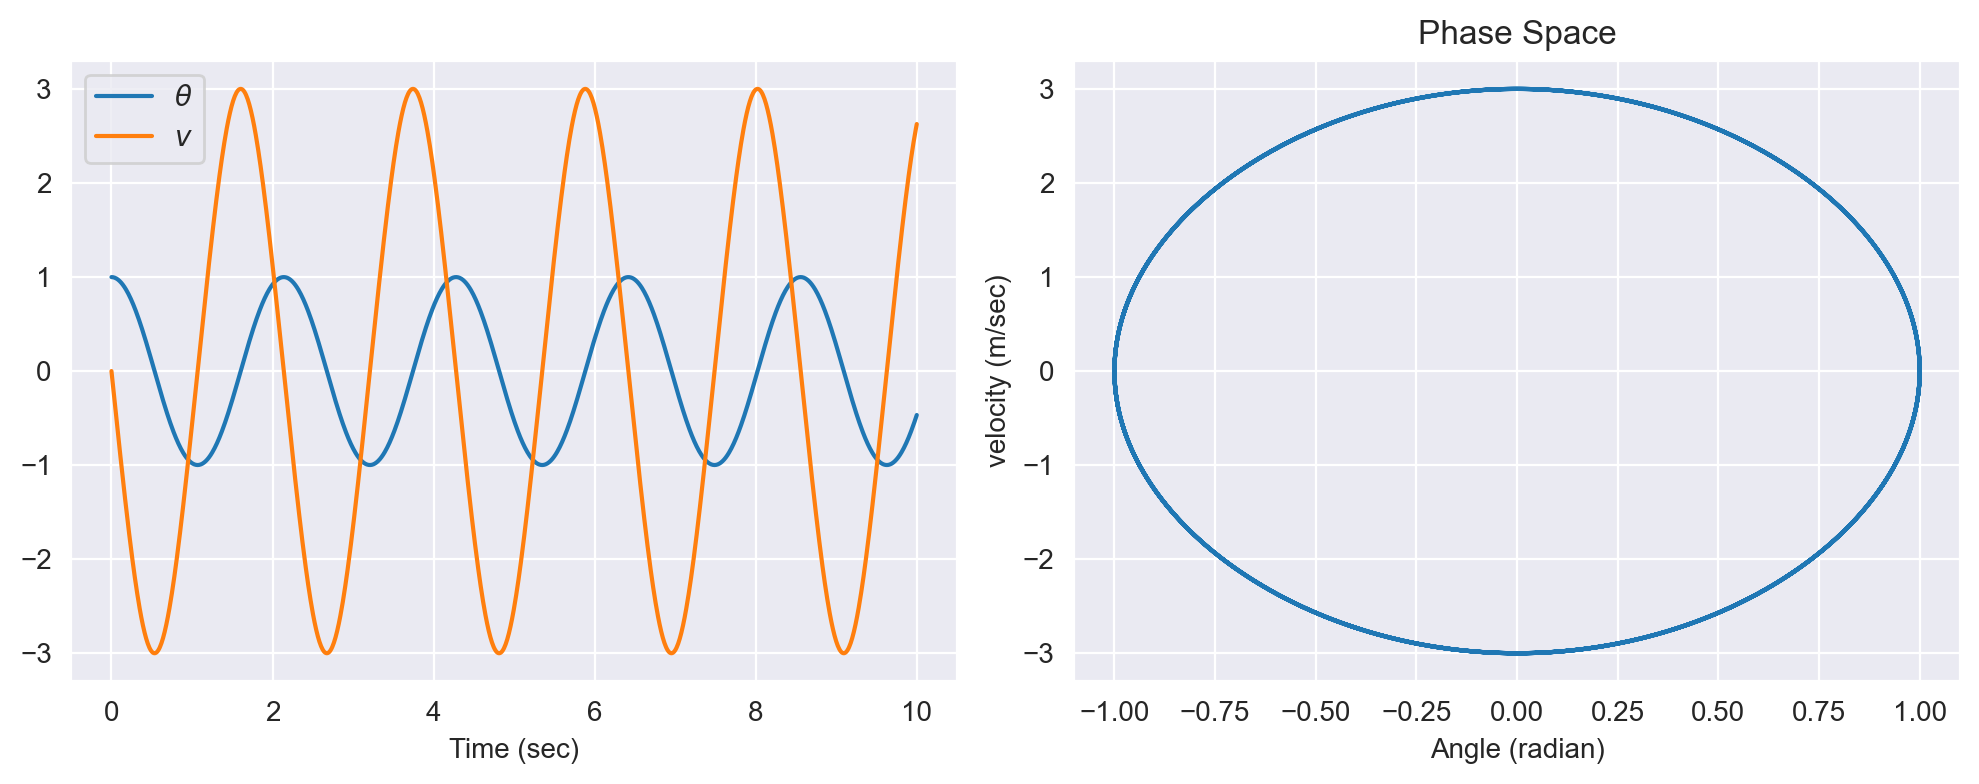

<module 'matplotlib.pyplot' from '/Users/samisaf/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

In [35]:
plot(ts, *results.T)